## 10-1
## MNIST-softmax

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
tf.set_random_seed(777)

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None, 10])

W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

In [6]:
# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X,W)+b

In [8]:
# define cost/loss & optimizer 
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits = hypothesis, labels = tf.stop_gradient(Y)
    )
)
train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, axis = 1), tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Epoch: 0001, Cost : 5.728569505
Epoch: 0002, Cost : 1.774595657
Epoch: 0003, Cost : 1.120494386
Epoch: 0004, Cost : 0.870654649
Epoch: 0005, Cost : 0.737279428
Epoch: 0006, Cost : 0.653342793
Epoch: 0007, Cost : 0.595188171
Epoch: 0008, Cost : 0.551375857
Epoch: 0009, Cost : 0.517696653
Epoch: 0010, Cost : 0.489896703
Epoch: 0011, Cost : 0.467383651
Epoch: 0012, Cost : 0.448888884
Epoch: 0013, Cost : 0.432247121
Epoch: 0014, Cost : 0.418299488
Epoch: 0015, Cost : 0.405785377
Epoch: 0016, Cost : 0.395064194
Epoch: 0017, Cost : 0.385584688
Epoch: 0018, Cost : 0.376460670
Epoch: 0019, Cost : 0.368092665
Epoch: 0020, Cost : 0.361464998
Epoch: 0021, Cost : 0.354501177
Epoch: 0022, Cost : 0.348267135
Epoch: 0023, Cost : 0.343099836
Epoch: 0024, Cost : 0.337166114
Epoch: 0025, Cost : 0.332162936
Epoch: 0026, Cost : 0.327677757
Epoch: 0027, Cost : 0.324332216
Epoch: 0028, Cost : 0.319750598
Epoch: 0029, Cost : 0.315708835
Epoch: 0030, Cost : 0.312314882
Epoch: 0031, Cost : 0.308946772
Epoch: 0

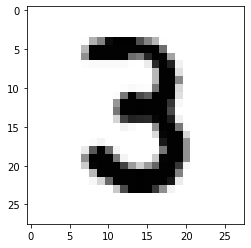

In [17]:
# trian my model 
with tf.Session() as sess : 
    # initialize
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs): 
        avg_cost = 0 
        
        for iteration in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _,cost_val = sess.run([train, cost],feed_dict = {X : batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
            
        print(f"Epoch: {(epoch + 1):04d}, Cost : {avg_cost:.9f}")

    print("Learing Finished!")
    # Test model and check accuracy 
    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}),
    )
    # Get one and predict
    r = random.randint(0,mnist.test.num_examples - 1)
    
    # argmax => 최대값의 인덱스 
    print("Label: ",sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis = 1)))
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis = 1),feed_dict = {X: mnist.test.images[r : r + 1]}
        ),
    )
    
    plt.imshow(
        mnist.test.images[r:r+1].reshape(28,28),
        cmap = "Greys",
        interpolation = "nearest",
    )
    plt.show()

## MNIST - NN

In [18]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [21]:
# weight & bias for nn layers 
W1 = tf.Variable(tf.random_normal([784,256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)

# matmul -> 행렬의 곱셉 (matrix multiplication )
W2 = tf.Variable(tf.random_normal([256,256]))
b1 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(X,W1)+b1)

W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3


In [23]:
# define cost/ loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Epoch: 0001 cost = 20.560759332
Epoch: 0002 cost = 5.023589465
Epoch: 0003 cost = 3.389932234
Epoch: 0004 cost = 2.511535576
Epoch: 0005 cost = 1.963295718
Epoch: 0006 cost = 1.563645199
Epoch: 0007 cost = 1.262014373
Epoch: 0008 cost = 1.041089502
Epoch: 0009 cost = 0.843446407
Epoch: 0010 cost = 0.693691239
Epoch: 0011 cost = 0.568353104
Epoch: 0012 cost = 0.458046663
Epoch: 0013 cost = 0.378584641
Epoch: 0014 cost = 0.308482025
Epoch: 0015 cost = 0.251321707
Learning Finished!
Accuracy: 0.9409
Label:  [4]
Prediction:  [4]


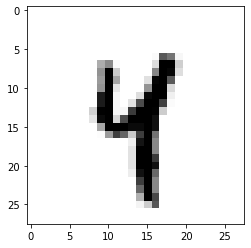

In [36]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model 
for epoch in range(training_epochs): 
    avg_cost = 0 
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X : batch_xs, Y : batch_ys}
        c, _ = sess.run([cost, optimizer],feed_dict = feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1),'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y : mnist.test.labels}))

# Get one and predict
r = random.randint(0,mnist.test.num_examples - 1)
print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1),feed_dict = {X : mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()